## build simple linear regression model

In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [80]:
data=pd.read_csv("delivery_time.csv")
data1=pd.read_csv("Salary_Data.csv")

In [110]:
data.columns

Index(['Delivery', 'sorting'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x27d3c1575e0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d3c157370>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d3c465190>],
 'medians': [<matplotlib.lines.Line2D at 0x27d3c299ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d3c2997f0>],
 'means': []}

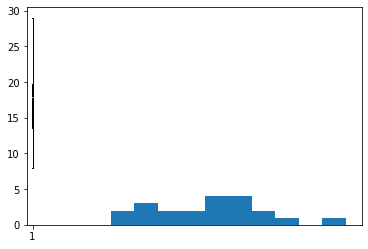

In [114]:
plt.hist(data.Delivery)
plt.boxplot(data.Delivery)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

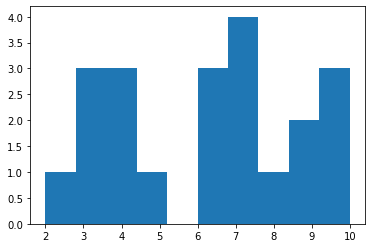

In [115]:
plt.hist(data.sorting)

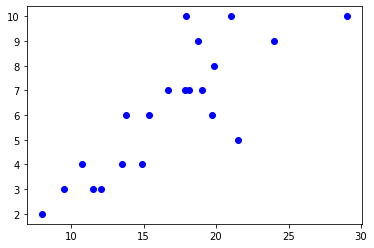

In [117]:
plt.plot(data.Delivery,data.sorting,"bo")

Text(0, 0.5, 'sorting')

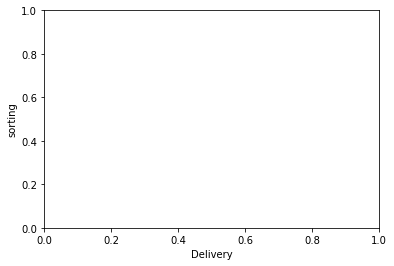

In [118]:
plt.xlabel("Delivery");plt.ylabel("sorting")

In [120]:
#correlation value between X and Y
data.sorting.corr(data.Delivery)

0.8259972607955325

In [121]:
np.corrcoef(data.sorting,data.Delivery)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [130]:
import statsmodels.formula.api as smf
model12=smf.ols("sorting~Delivery",data=data).fit()


In [131]:
model12.params


Intercept   -0.756673
Delivery     0.413744
dtype: float64

In [132]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sorting   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.98e-06
Time:                        13:14:06   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery       0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
model3=smf.ols("Delivery~np.log(sorting)",data=data).fit()

In [136]:
model3.params

Intercept          1.159684
np.log(sorting)    9.043413
dtype: float64

In [137]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.64e-06
Time:                        13:18:57   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
model12.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
Delivery,0.278169,0.549318


In [139]:
model3.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sorting),6.16977,11.917057


In [142]:
pred2 = model12.predict(data)

In [143]:
pred3 = model3.predict(data)

Text(0, 0.5, 'Delivery time')

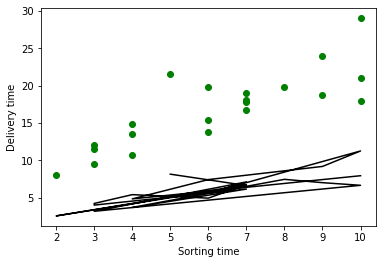

In [144]:
plt.scatter(x=data.sorting, y=data.Delivery, color='green')
plt.plot(data.sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

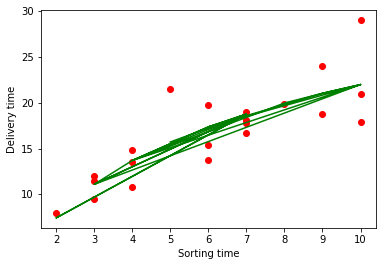

In [145]:
plt.scatter(x=data.sorting, y=data.Delivery, color='red')
plt.plot(data.sorting, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")